In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt


In [13]:
col_names = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
            'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
# load dataset
df = pd.read_csv("student-por.csv", header=None, names=col_names)

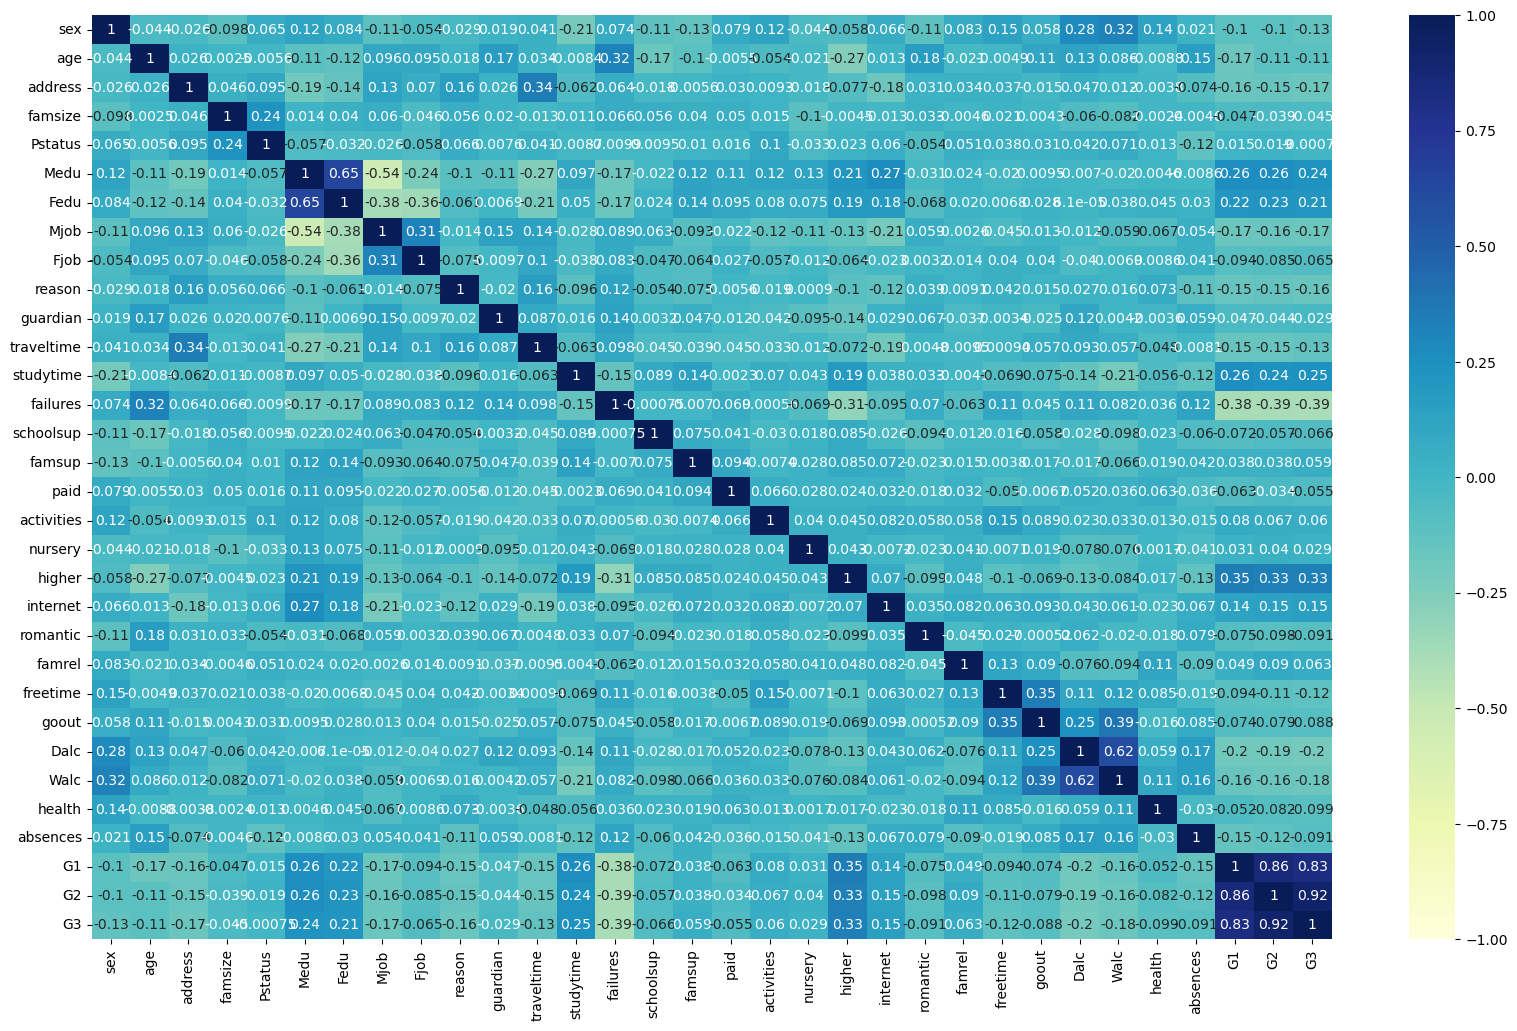

In [14]:
import pandas as pd
import seaborn as sns

# Assuming df and col_names are defined
for i in range(0, 33):   
    df[col_names[i]].replace(['GP', 'MS'], [0, 1], inplace=True)
    df[col_names[i]].replace(['no', 'yes'], [0, 1], inplace=True)
    df[col_names[i]].replace(['F', 'M'], [0, 1], inplace=True)
    df[col_names[i]].replace(['U', 'R'], [0, 1], inplace=True)
    df[col_names[i]].replace(['LE3', 'GT3'], [0, 1], inplace=True)
    df[col_names[i]].replace(['A', 'T'], [0, 1], inplace=True)

df['Mjob'].replace(['teacher', 'health', 'services', 'at_home', 'other'], [0, 1, 2, 3, 4], inplace=True)
df['Fjob'].replace(['teacher', 'health', 'services', 'at_home', 'other'], [0, 1, 2, 3, 4], inplace=True)
df['reason'].replace(['home', 'reputation', 'course', 'other'], [0, 1, 2, 3], inplace=True)
df['guardian'].replace(['mother', 'father', 'other'], [0, 1, 2], inplace=True)

# Convert entire DataFrame to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN or non-numeric values
# print(df.info())


# Calculate correlation matrix
data = df.copy().drop(columns=['school']).corr()

plt.figure(figsize=(20, 12))

# Display correlation map
pcmp = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap='YlGnBu')


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

feature_cols = ['failures', 'age']

data = pd.read_csv('student-por.csv')
X = data[['failures', 'age']]
y = data['G3']

# Check for and handle missing values in the target variable
if y.isnull().sum() > 0:
    # Option 1: Remove rows with missing values
    df.dropna(subset=[target_var], inplace=True)
    # Option 2: Impute missing values
    # y.fillna(y.mean(), inplace=True)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)


In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

unique_values = y.unique()
print("Unique values in the target variable:", unique_values)
print("Number of unique values:", len(unique_values))


Accuracy: 0.15384615384615385
Unique values in the target variable: [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
Number of unique values: 17


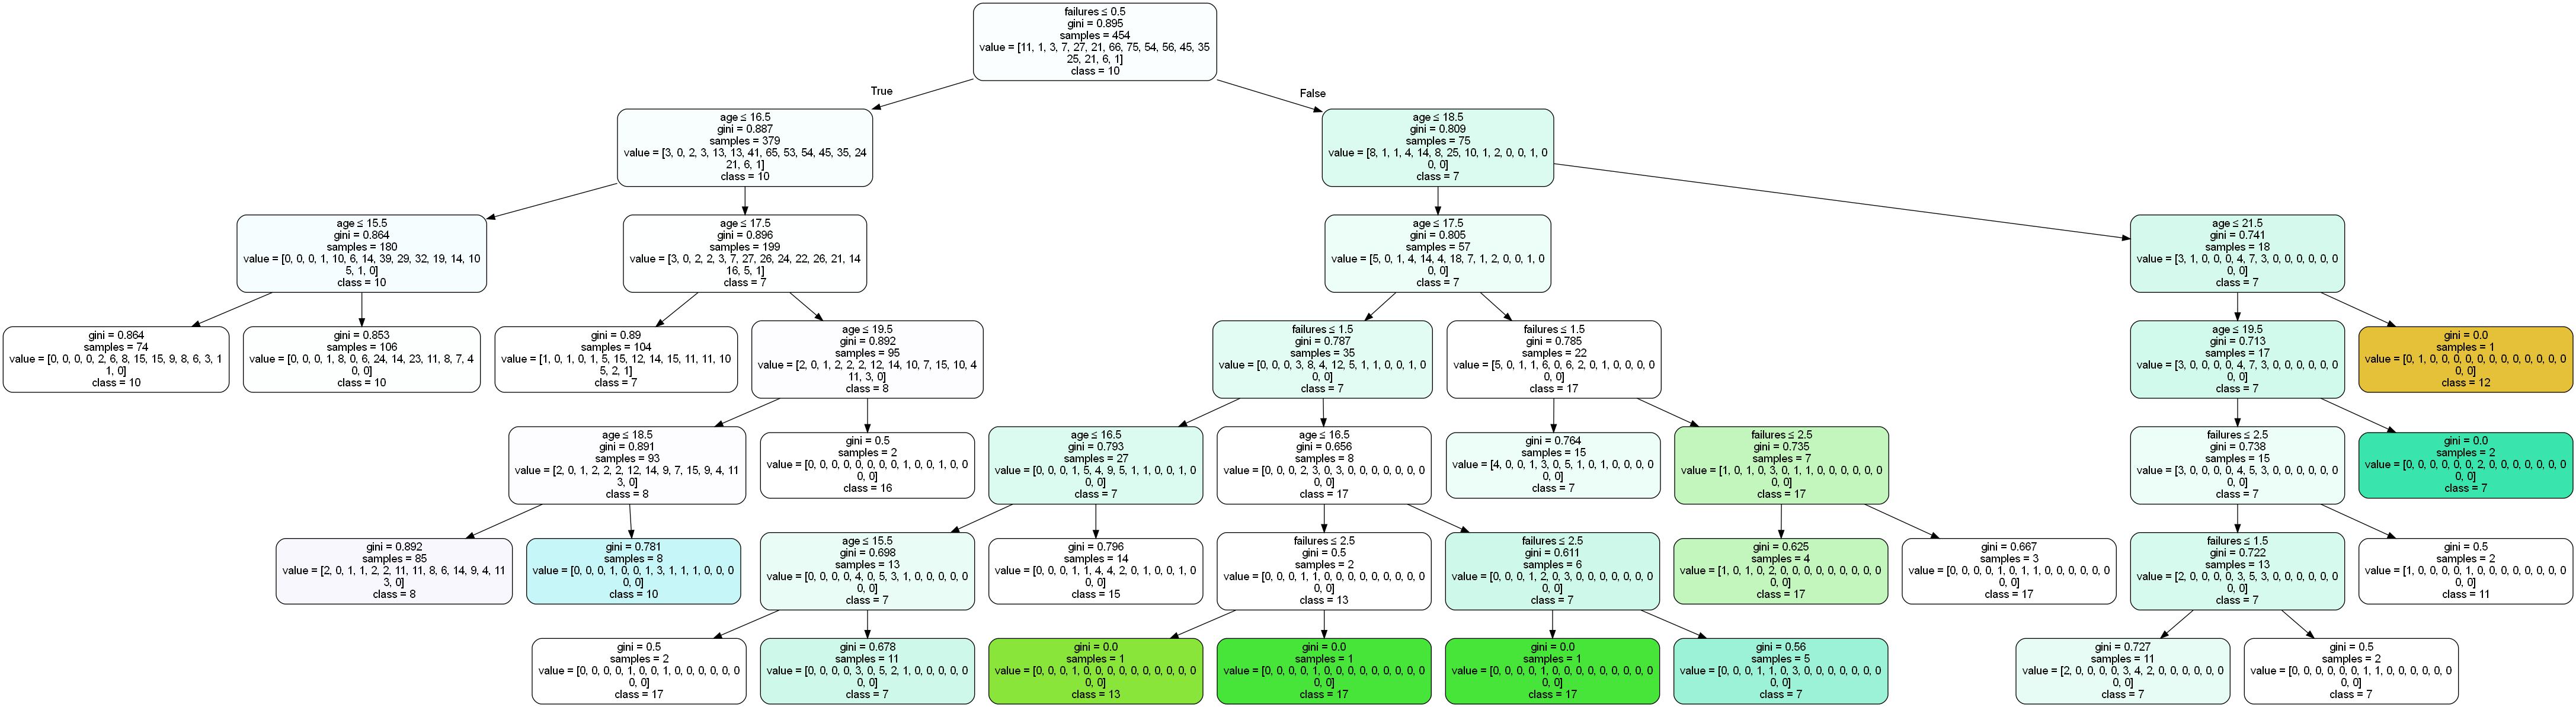

In [12]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import graphviz

# Convert numeric target variable to strings
y_str = y.astype(str)

# Export the tree as a DOT file
dot_data = export_graphviz(clf, out_file=None, 
                           filled=True, rounded=True,
                           special_characters=True, feature_names=feature_cols, class_names=y_str.unique())

# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')  # Save the tree to a file (e.g., 'decision_tree.png')
Image(filename='decision_tree.png')  # Display the tree


Accuracy: 0.15384615384615385
Unique values in the target variable: [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
Number of unique values: 17

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.16923076923076924
